**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('/content/sample_data/restaurante.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Original Params
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}
# Test Params
params = {
    'criterion':  ['gini'],
    'max_depth':  [10],
    'max_features': [0.4],
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [ ]:
modelo= DecisionTreeClassifier(max_depth=10, criterion='gini', max_features=0.4)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=10, max_features=0.4)

In [ ]:
#modelo.fit(X_treino, y_treino)
#print(modelo.best_params_)
#print(modelo.best_score_)



> **Vamos testar o modelo?**



In [ ]:

previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array(['Nao', 'Nao', 'Nao'], dtype=object)



> **Será se o modelo acertou?**



In [ ]:
y_teste

array(['Nao', 'Sim', 'Nao'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6666666666666666

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[2, 0],
       [1, 0]])

0.6666666666666666

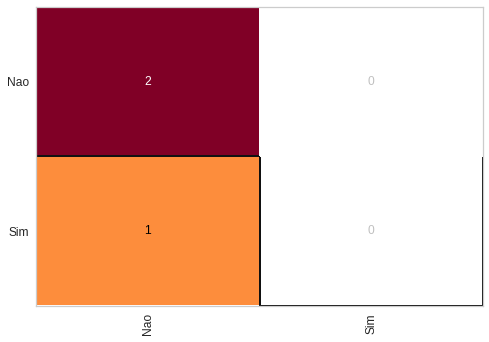

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.67      1.00      0.80         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


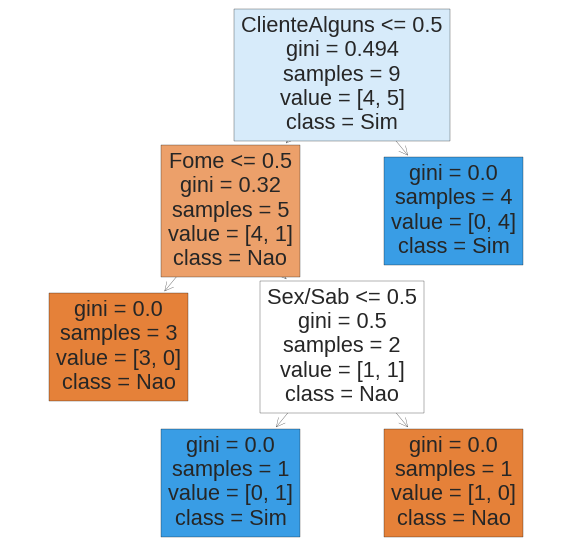

In [ ]:
from sklearn import tree
previsores = ['ClienteAlguns', 'ClienteNenhum', 'ClienteCheio', 'PrecoR', 'PrecoRR', 'PrecoRRR', 'Tempo0-10', 'Tempo10-30', 'Tempo30-60', 'Tempo>60', 'TipoHamburguer', 'TipoTailandes', 'TipoFrances', 'TipoItaliano', 'Bar', 'Sex/Sab', 'Reserva', 'Chuva', 'Fome', 'Alternativa']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);